In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.model_selection import train_test_split

In [5]:
#data import
data = pd.read_csv('CreditOnev2.csv', header = 0)
data.head()

,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,gender,label_education,label_default,LIMIT_BAL_tier,AGE_tier
0,0,1,20000,1,24,2,2,-1,-1,-2,...,0,0,1,1,0,1,4,1,50k,30
1,1,2,120000,2,26,-1,2,0,0,0,...,0,0,1,1,0,1,4,1,140k,30
2,2,3,90000,2,34,0,0,0,0,0,...,0,0,1,0,1,1,4,2,140k,40
3,3,4,50000,1,37,0,0,0,0,0,...,0,0,1,0,1,1,4,2,50k,40
4,4,5,50000,1,57,-1,0,-1,0,0,...,0,0,1,0,1,0,4,2,50k,60


In [6]:
data = data.drop(["label_default", "default payment next month_not default"],axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          30000 non-null  int64 
 1   ID                                  30000 non-null  int64 
 2   LIMIT_BAL                           30000 non-null  int64 
 3   MARRIAGE                            30000 non-null  int64 
 4   AGE                                 30000 non-null  int64 
 5   PAY_0                               30000 non-null  int64 
 6   PAY_2                               30000 non-null  int64 
 7   PAY_3                               30000 non-null  int64 
 8   PAY_4                               30000 non-null  int64 
 9   PAY_5                               30000 non-null  int64 
 10  PAY_6                               30000 non-null  int64 
 11  BILL_AMT1                           30000 non-null  in

Regression Model; Credit Balance dependent variable

In [11]:
#features
X = data.drop(['LIMIT_BAL', 'LIMIT_BAL_tier'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,Unnamed: 0,ID,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,gender,label_education,AGE_tier
0,0,1,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0,0,1,1,1,4,30
1,1,2,2,26,-1,2,0,0,0,2,...,1,0,0,0,0,1,1,1,4,30
2,2,3,2,34,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,4,40
3,3,4,1,37,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,4,40
4,4,5,1,57,-1,0,-1,0,0,0,...,0,1,0,0,0,1,0,0,4,60


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Unnamed: 0                          30000 non-null  int64
 1   ID                                  30000 non-null  int64
 2   MARRIAGE                            30000 non-null  int64
 3   AGE                                 30000 non-null  int64
 4   PAY_0                               30000 non-null  int64
 5   PAY_2                               30000 non-null  int64
 6   PAY_3                               30000 non-null  int64
 7   PAY_4                               30000 non-null  int64
 8   PAY_5                               30000 non-null  int64
 9   PAY_6                               30000 non-null  int64
 10  BILL_AMT1                           30000 non-null  int64
 11  BILL_AMT2                           30000 non-null  int64
 12  BILL

In [24]:
#dependent variable
y = data['LIMIT_BAL']
print(y)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [25]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [26]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.4364417419012179
Linear Regression 0.35887287374060045
Support Vector Regression -0.05041620223694787


In [27]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [28]:
algo = RandomForestRegressor()
model = algo.fit(X_train,y_train)

In [29]:
#predictions
predictions = model.predict(X_test)

In [30]:
#evaluating results
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.472
RMSE: 94319.024


In [31]:
#plotting results
#plt.scatter(y_test, predictions, c='blue','green', alpha = 0.5)
#plt.xlabel('Ground Truth')
#plt.ylabel('Predictions')
#plt.show()

Classification Model; Credit Balance dependent variable

In [32]:
import seaborn as sns
from collections import Counter
import pandas_profiling as pp
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#helpers
%matplotlib inline

In [33]:
#features
X = data.drop(['LIMIT_BAL', 'LIMIT_BAL_tier'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,Unnamed: 0,ID,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,gender,label_education,AGE_tier
0,0,1,1,24,2,2,-1,-1,-2,-2,...,1,0,0,0,0,1,1,1,4,30
1,1,2,2,26,-1,2,0,0,0,2,...,1,0,0,0,0,1,1,1,4,30
2,2,3,2,34,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,4,40
3,3,4,1,37,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,4,40
4,4,5,1,57,-1,0,-1,0,0,0,...,0,1,0,0,0,1,0,0,4,60


In [34]:
#dependent variable
y = data['LIMIT_BAL_tier']
print(y)

0         50k
1        140k
2        140k
3         50k
4         50k
         ... 
29995    240k
29996    240k
29997     50k
29998    140k
29999     50k
Name: LIMIT_BAL_tier, Length: 30000, dtype: object


In [35]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [36]:
#Modeling - DecisionTreeClassifier
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [37]:
#Predictions
preds = model.predict(X_test)

In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         10k       0.40      0.34      0.36       104
        140k       0.45      0.45      0.45      1504
          1M       0.49      0.48      0.48      1431
        240k       0.40      0.41      0.40      1547
         50k       0.62      0.61      0.61      1414

    accuracy                           0.48      6000
   macro avg       0.47      0.46      0.46      6000
weighted avg       0.48      0.48      0.48      6000



In [43]:
data.groupby("LIMIT_BAL_tier")["ID"].count()

LIMIT_BAL_tier
10k      493
140k    7614
1M      7067
240k    7643
50k     7183
Name: ID, dtype: int64

In [44]:
from sklearn.tree import plot_tree

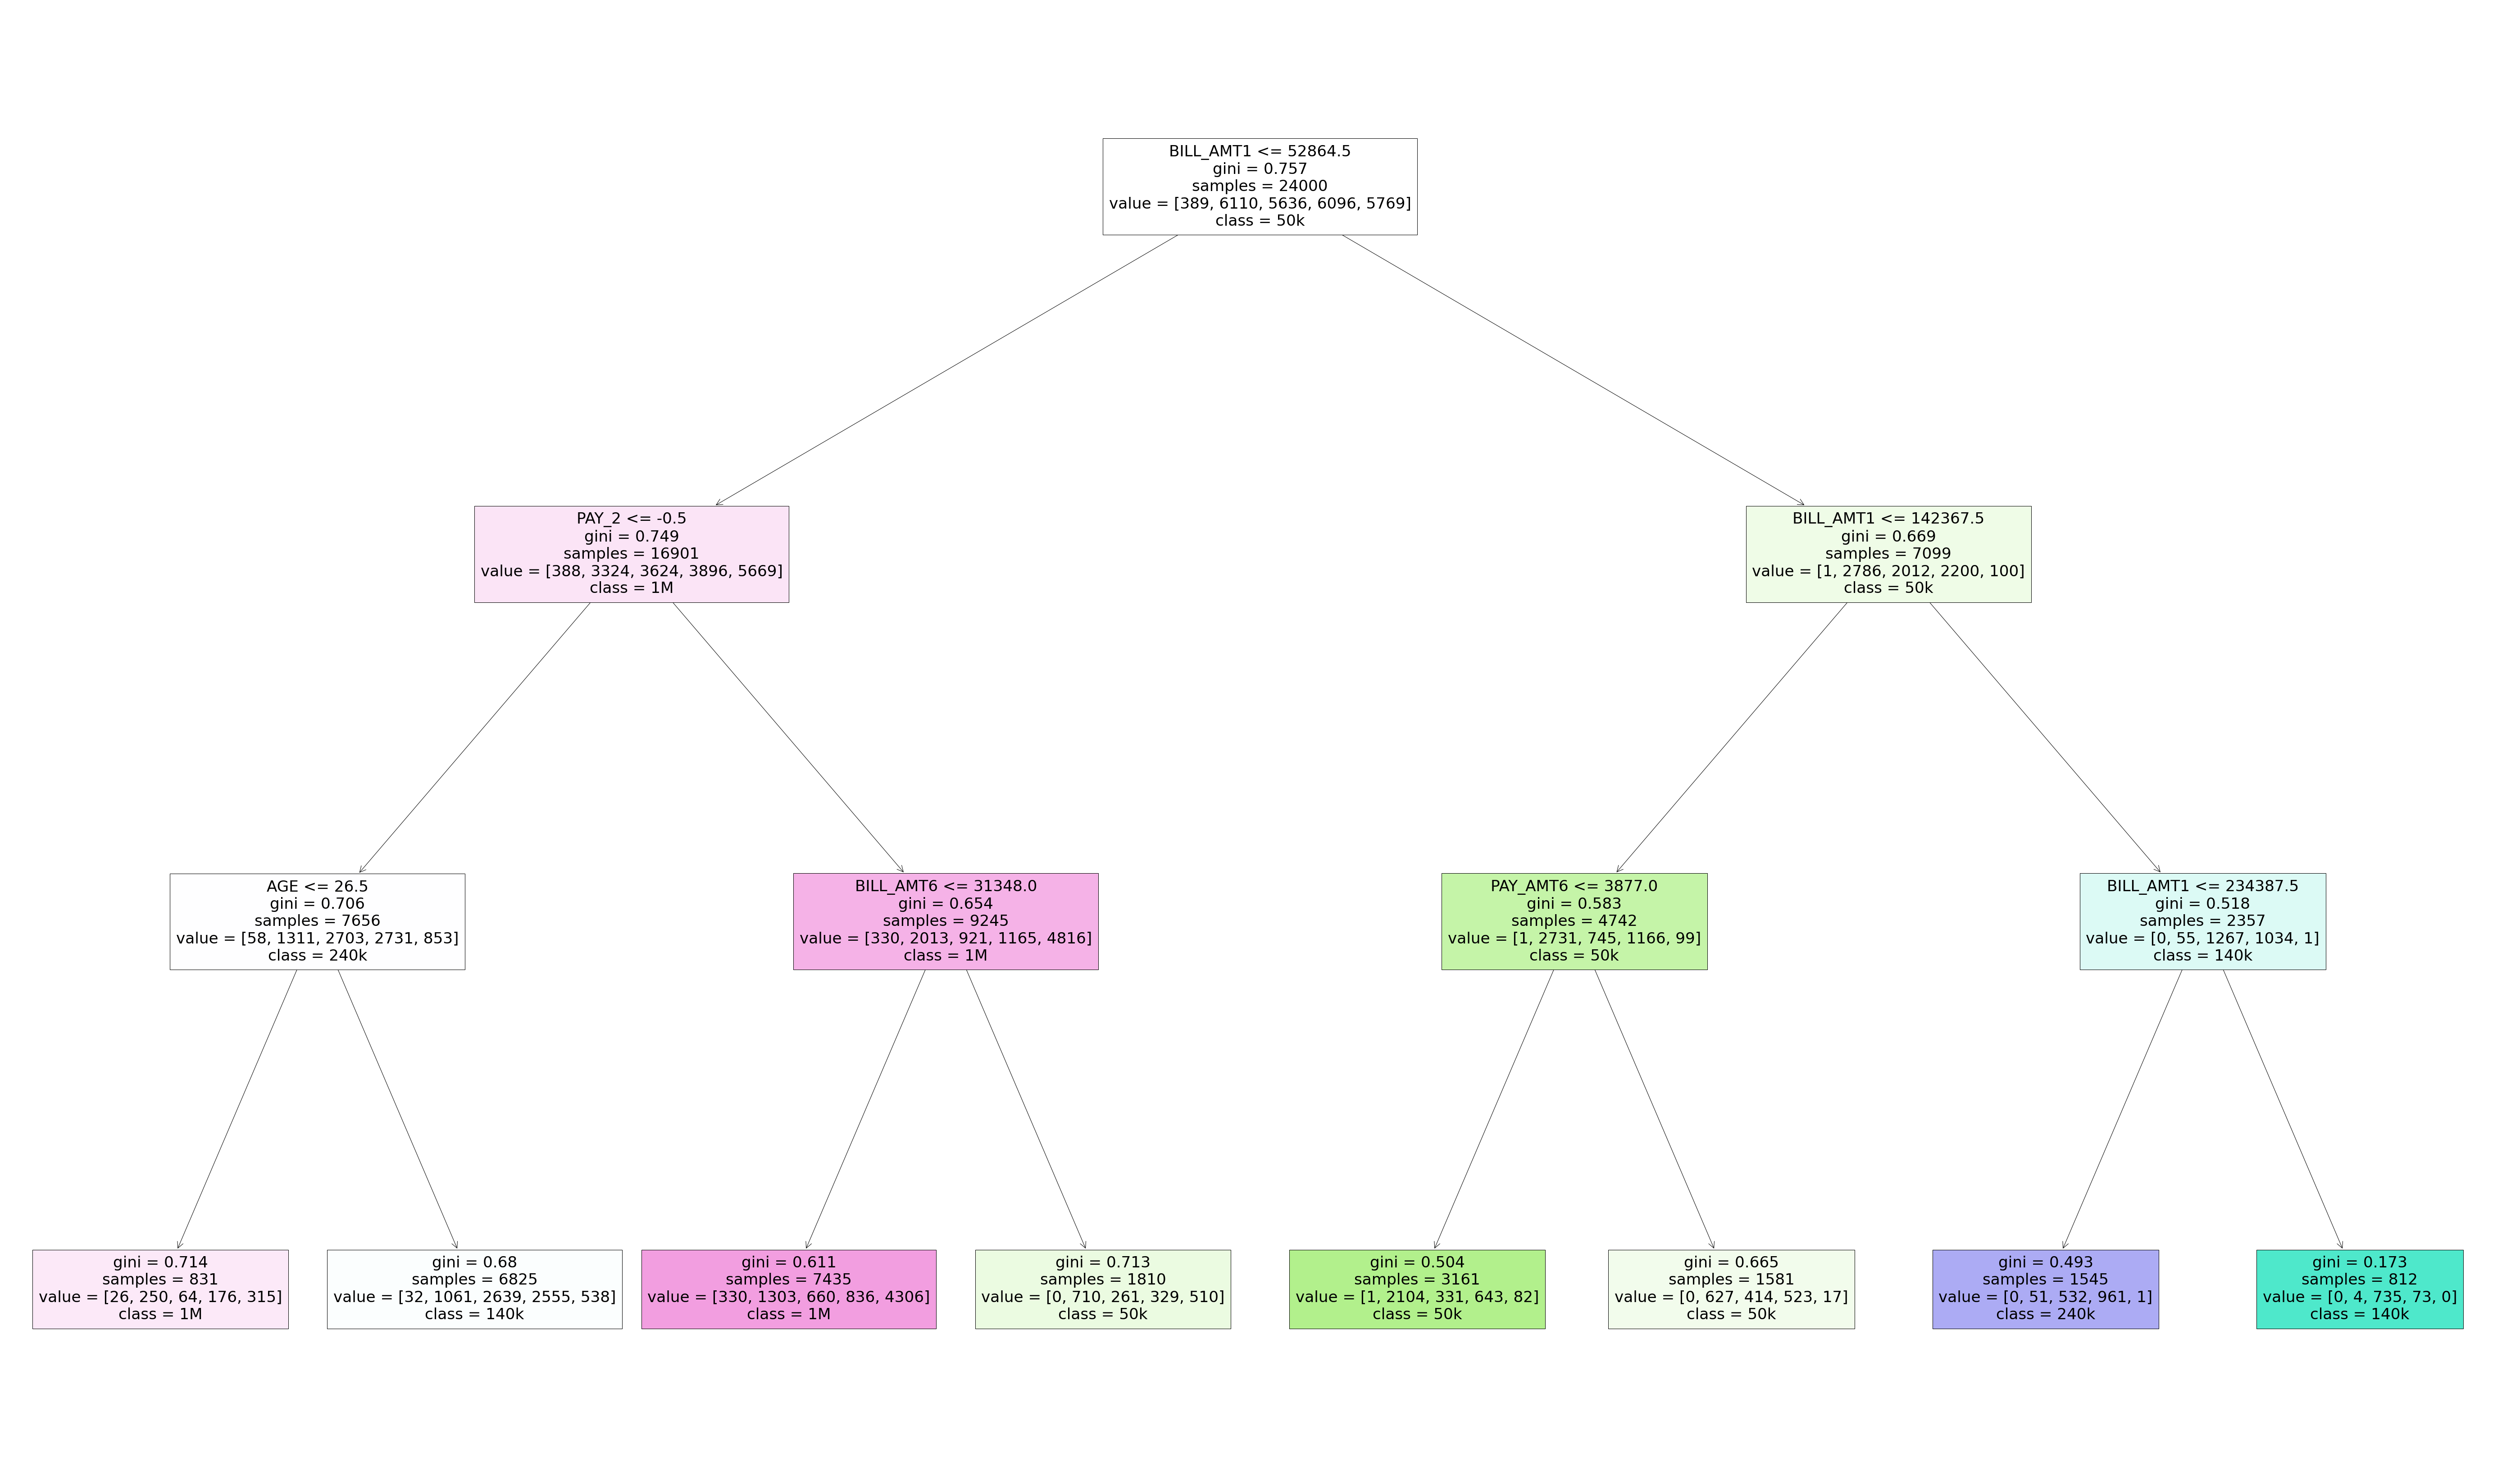

In [56]:
algo = DecisionTreeClassifier(max_depth = 3)
model = algo.fit(X_train,y_train)
fig = plt.figure(figsize=(100,60))
tree = plot_tree(model, feature_names=X.columns, class_names=['10k', '50k', '140k', '240k', '1M'], filled=True)

In [57]:
#Modeling - RandomForestClassifier
algo = RandomForestClassifier()
model = algo.fit(X_train,y_train)

In [58]:
#Predictions
preds = model.predict(X_test)

In [59]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         10k       0.74      0.41      0.53       104
        140k       0.57      0.56      0.57      1504
          1M       0.58      0.54      0.56      1431
        240k       0.47      0.44      0.45      1547
         50k       0.67      0.80      0.73      1414

    accuracy                           0.58      6000
   macro avg       0.61      0.55      0.57      6000
weighted avg       0.57      0.58      0.57      6000



In [60]:
#Modeling - GradientBoostingClassifier
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [61]:
#Predictions
preds = model.predict(X_test)

In [62]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         10k       0.61      0.44      0.51       104
        140k       0.58      0.54      0.56      1504
          1M       0.61      0.53      0.57      1431
        240k       0.47      0.48      0.48      1547
         50k       0.67      0.80      0.73      1414

    accuracy                           0.58      6000
   macro avg       0.59      0.56      0.57      6000
weighted avg       0.58      0.58      0.58      6000



In [63]:
#Cross validation
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.5595333333333333
Decision Tree Classifier 0.45116666666666666
Gradient Boosting Classifier 0.49529999999999996


Classification Model; 'default payment next month_default' dependent variable

In [64]:
#features
X = data.drop(['LIMIT_BAL_tier', 'default payment next month_default'], axis=1)
print('Summary of feature sample')
X.head()

Summary of feature sample


,Unnamed: 0,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,gender,label_education,AGE_tier
0,0,1,20000,1,24,2,2,-1,-1,-2,...,0,1,0,0,0,0,1,1,4,30
1,1,2,120000,2,26,-1,2,0,0,0,...,2000,1,0,0,0,0,1,1,4,30
2,2,3,90000,2,34,0,0,0,0,0,...,5000,1,0,0,0,0,1,1,4,40
3,3,4,50000,1,37,0,0,0,0,0,...,1000,1,0,0,0,0,1,1,4,40
4,4,5,50000,1,57,-1,0,-1,0,0,...,679,0,1,0,0,0,1,0,4,60


In [65]:
#dependent variable
y = data['default payment next month_default']
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: int64


In [66]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)

In [67]:
#Cross validation
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    names.append(name)
    results.append(result)
    
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8108666666666666
Decision Tree Classifier 0.6855333333333333
Gradient Boosting Classifier 0.7908999999999999


In [68]:
#Modeling - RandomForestClassifier
algo = RandomForestClassifier()
model = algo.fit(X_train,y_train)

In [69]:
#Predictions
preds = model.predict(X_test)

In [70]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.65      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [71]:
#Modeling - GradientBoostingClassifier
algo = GradientBoostingClassifier()
model = algo.fit(X_train,y_train)

In [72]:
#Predictions
preds = model.predict(X_test)

In [73]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [74]:
#Modeling - DecisionTreeClassifier
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [75]:
#Predictions
preds = model.predict(X_test)

In [76]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4687
           1       0.38      0.41      0.39      1313

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.73      6000



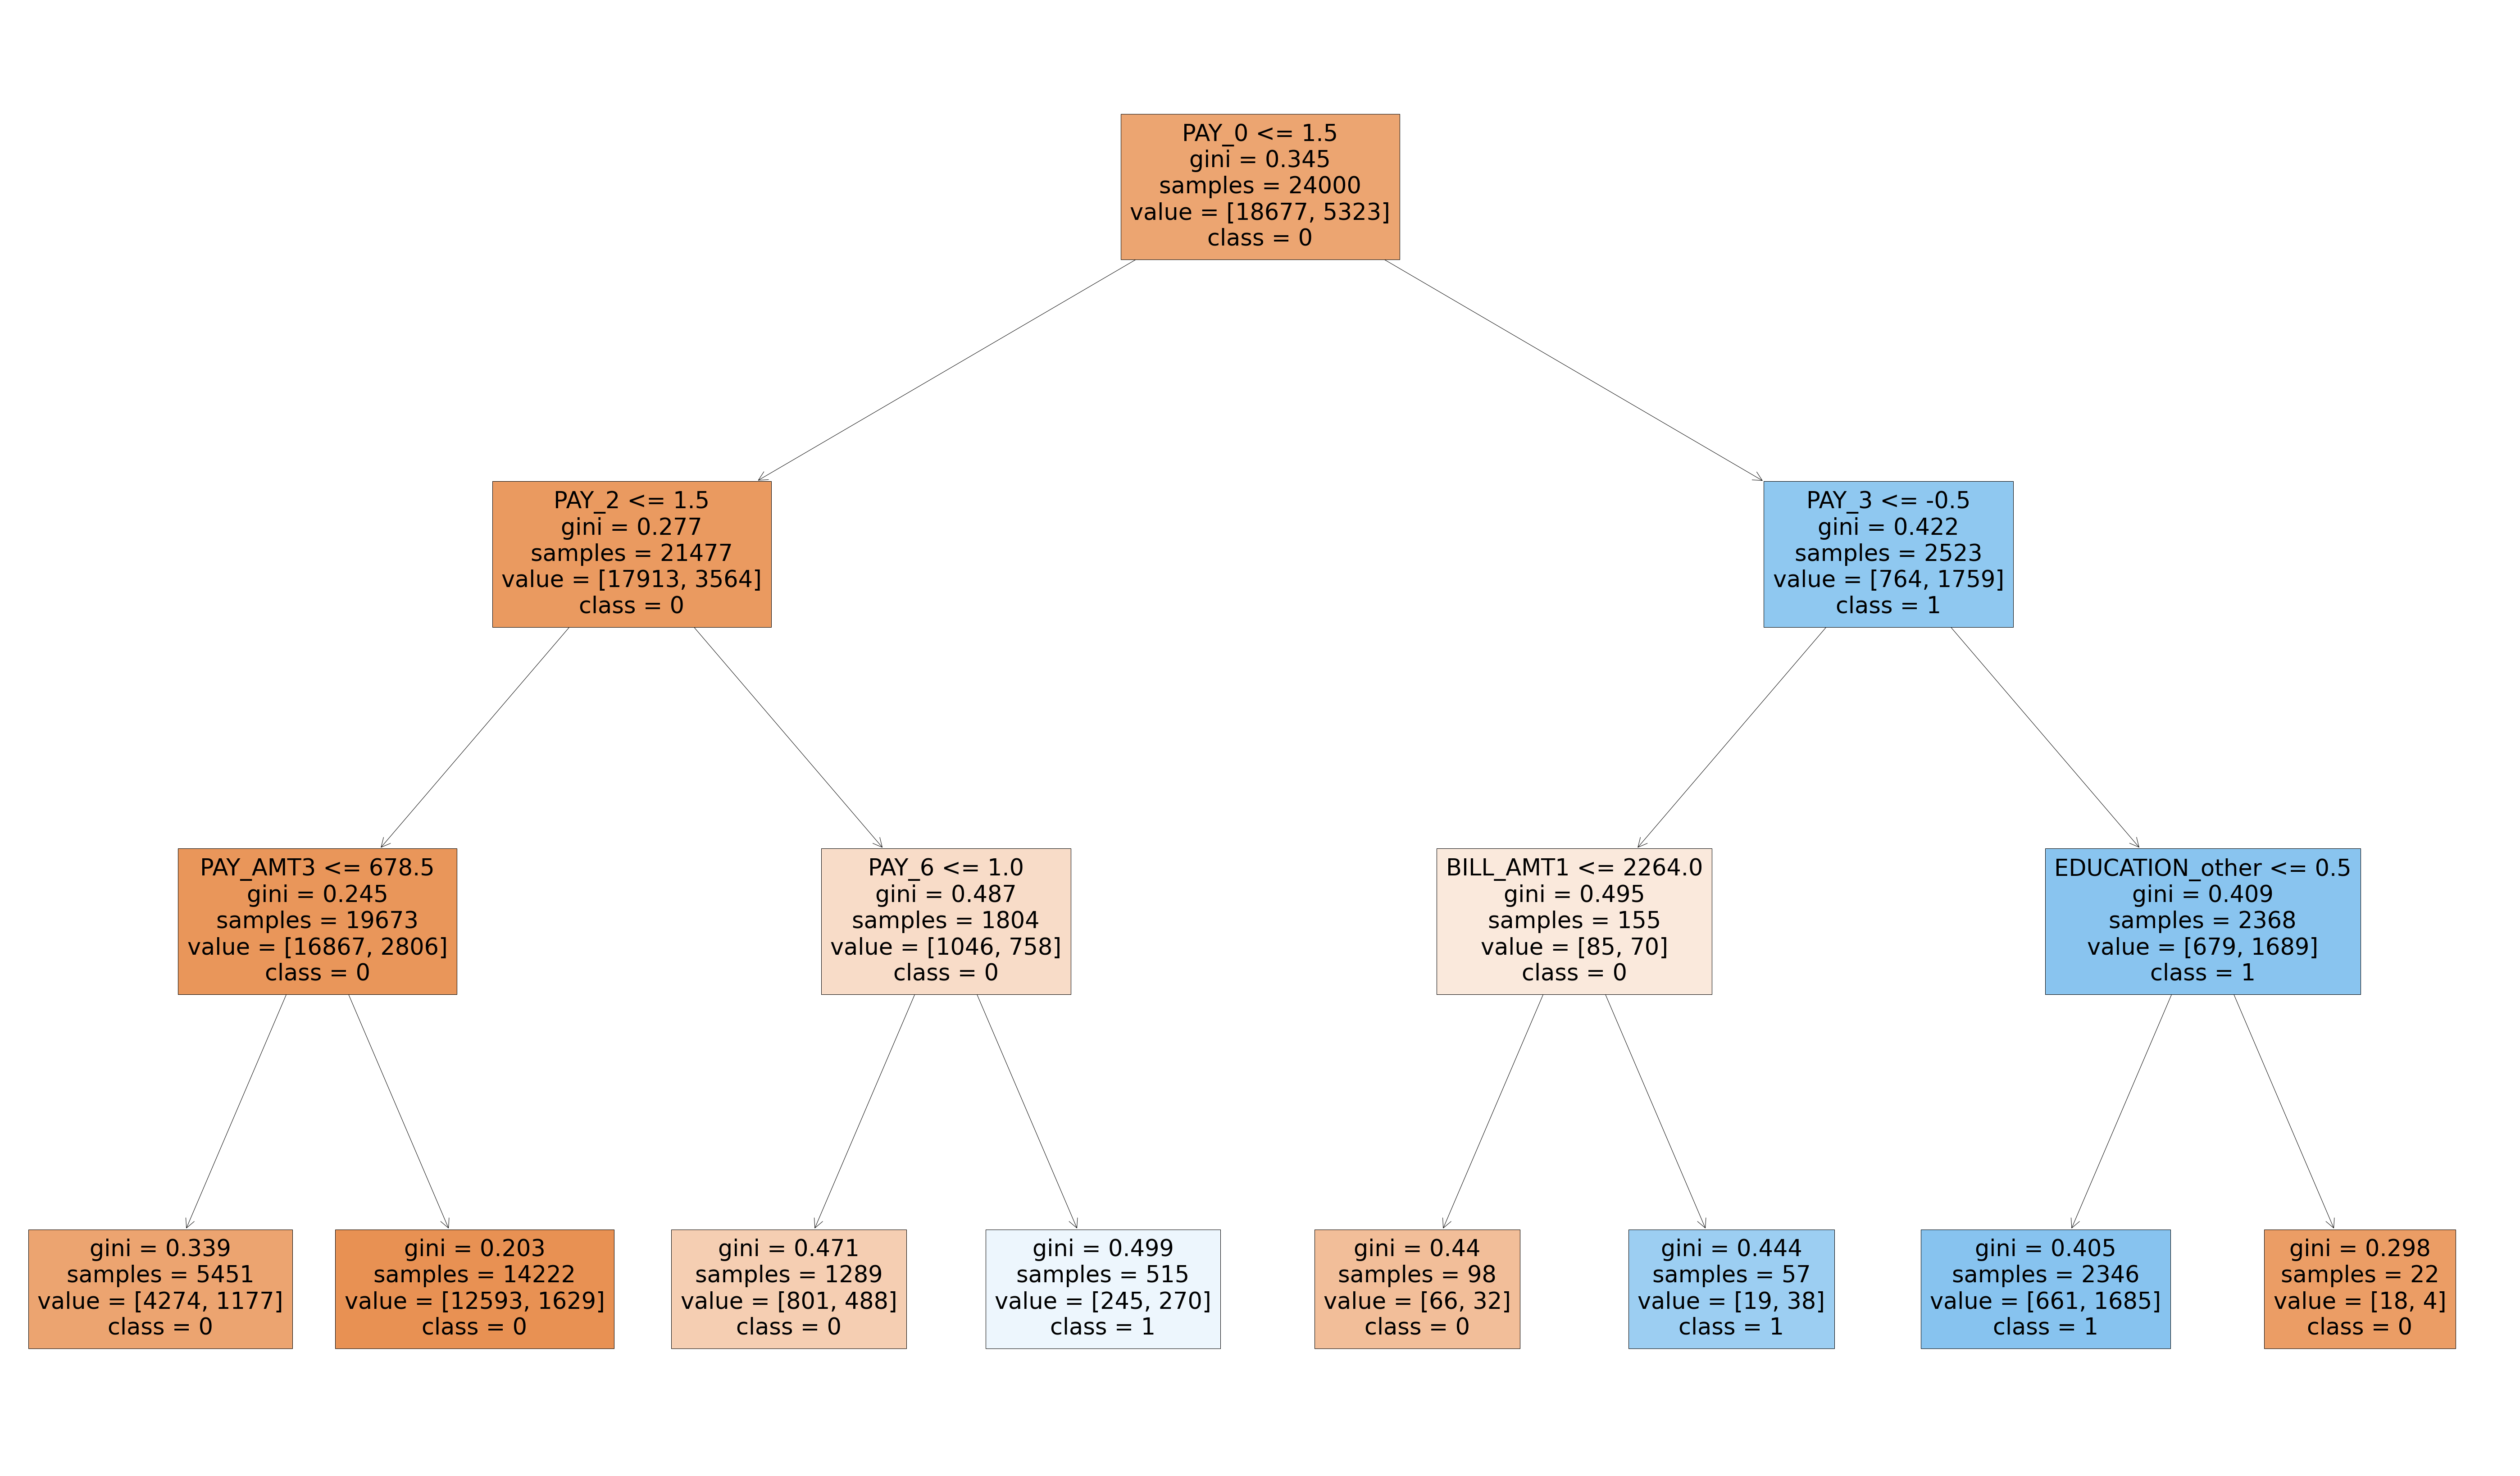

In [77]:
algo = DecisionTreeClassifier(max_depth = 3)
model = algo.fit(X_train,y_train)
fig = plt.figure(figsize=(100,60))
tree = plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)